In [1]:
from bw_recipe_2016 import (
    LandOccupation,
    get_biosphere_database, 
    extract_recipe,
)

In [2]:
data = extract_recipe()[17]

In [3]:
biosphere = get_biosphere_database()

In [4]:
gw = LandOccupation(data, biosphere)

In [5]:
gw.apply_strategies()

Applying strategy: generic_reformat
Applying strategy: set_unit
Applying strategy: add_missing_flows
Applying strategy: reset_categories
Applying strategy: complete_method_name
Applying strategy: match_multiple
Applied 6 strategies in 0.01 seconds


In [6]:
gw.data[0]

{'name': ('ReCiPe 2016', 'v1.1 (20180117)', 'Land occupation'),
 'unit': 'm2∙annual crop eq',
 'filename': 'ReCiPe2016_CFs_v1.1_20180117.xlsx',
 'description': '',
 'exchanges': [{'name': 'Occupation, pasture, man made, intensive',
   'categories': ('natural resource',),
   'amount': 0.55,
   'input': ('biosphere3', '98b723d4-3362-4b38-8b1e-1bedacfd5e27')},
  {'name': 'Occupation, permanent crop, non-irrigated, intensive',
   'categories': ('natural resource',),
   'amount': 0.7,
   'input': ('biosphere3', 'c9461a73-d00a-4fc7-a890-a9eda6af3185')},
  {'name': 'Occupation, mineral extraction site',
   'categories': ('natural resource',),
   'amount': 0.73,
   'input': ('biosphere3', '379ba5c9-5c3a-43d0-8e2d-605ad9c39e46')},
  {'name': 'Occupation, annual crop, greenhouse',
   'categories': ('natural resource',),
   'amount': 0.73,
   'input': ('biosphere3', '9e80f7cd-47fa-4c7f-8f2c-bdb9731b3196')},
  {'name': 'Occupation, permanent crop, irrigated, intensive',
   'categories': ('natural 

In [ ]:
gw.write_excel("land_occupation")

In [6]:
gw.statistics()

1 methods
41 cfs
0 unlinked cfs


(1, 41, 0)

In [7]:
comp = gw.compare_to_previous()

In [8]:
[(key, len(comp[key])) for key in comp]

[('found', 41), ('missing', 0), ('reference', 48)]

Present in previous ReCiPe, missing here

In [11]:
comp['reference']

{'occupation, annual crop',
 'occupation, annual crop, flooded crop',
 'occupation, annual crop, greenhouse',
 'occupation, annual crop, irrigated',
 'occupation, annual crop, irrigated, extensive',
 'occupation, annual crop, irrigated, intensive',
 'occupation, annual crop, non-irrigated',
 'occupation, annual crop, non-irrigated, extensive',
 'occupation, annual crop, non-irrigated, intensive',
 'occupation, arable land, unspecified use',
 'occupation, bare area (non-use)',
 'occupation, cropland fallow (non-use)',
 'occupation, dump site',
 'occupation, field margin/hedgerow',
 'occupation, forest, extensive',
 'occupation, forest, intensive',
 'occupation, forest, primary (non-use)',
 'occupation, forest, secondary (non-use)',
 'occupation, forest, unspecified',
 'occupation, grassland, natural (non-use)',
 'occupation, grassland, natural, for livestock grazing',
 'occupation, heterogeneous, agricultural',
 'occupation, inland waterbody, unspecified',
 'occupation, lake, artificial

In [12]:
comp['found']

{'occupation, annual crop',
 'occupation, annual crop, greenhouse',
 'occupation, annual crop, irrigated',
 'occupation, annual crop, irrigated, intensive',
 'occupation, annual crop, non-irrigated',
 'occupation, annual crop, non-irrigated, extensive',
 'occupation, annual crop, non-irrigated, intensive',
 'occupation, construction site',
 'occupation, dump site',
 'occupation, forest, extensive',
 'occupation, forest, intensive',
 'occupation, grassland, natural (non-use)',
 'occupation, industrial area',
 'occupation, lake, artificial',
 'occupation, mineral extraction site',
 'occupation, pasture, man made',
 'occupation, pasture, man made, extensive',
 'occupation, pasture, man made, intensive',
 'occupation, permanent crop',
 'occupation, permanent crop, irrigated, intensive',
 'occupation, permanent crop, non-irrigated, intensive',
 'occupation, river, artificial',
 'occupation, seabed, drilling and mining',
 'occupation, seabed, infrastructure',
 'occupation, shrub land, sclero

In [9]:
sorted(comp['reference'].difference(comp['found']))

['occupation, bare area (non-use)',
 'occupation, cropland fallow (non-use)',
 'occupation, forest, primary (non-use)',
 'occupation, forest, secondary (non-use)',
 'occupation, inland waterbody, unspecified',
 'occupation, lake, natural (non-use)',
 'occupation, river, natural (non-use)',
 'occupation, seabed, natural (non-use)',
 'occupation, seabed, unspecified',
 'occupation, snow and ice (non-use)',
 'occupation, unspecified',
 'occupation, unspecified, natural (non-use)',
 'occupation, wetland, coastal (non-use)',
 'occupation, wetland, inland (non-use)']

In [10]:
gw.write_methods(overwrite=True)

Wrote 1 LCIA methods with 41 characterization factors


In [11]:
gw.data[0]['name']

('ReCiPe 2016', 'v1.1 (20180117)', 'Land occupation')

# Compare to previous ReCiPe method

In [13]:
%matplotlib inline

In [14]:
import bw2data, bw2calc
import pyprind
import seaborn as sb
import numpy as np

In [15]:
keys = sorted([x.key for x in bw2data.Database("ecoinvent 3.6 cutoff")])

In [16]:
results_reference, results_2016 = [], []

In [17]:
lca = bw2calc.LCA({keys[0]: 1}, gw.previous_reference)
lca.lci()
lca.lcia()

In [18]:
reference_cm = lca.characterization_matrix.copy()

In [19]:
lca.switch_method(('ReCiPe 2016', 'v1.1 (20180117)', 'Land occupation'))

In [20]:
lca.characterization_matrix.sum(), reference_cm.sum()

(20.45000022649765, 29.200000017881393)

In [21]:
new_cm = lca.characterization_matrix.copy()

In [22]:
for key in pyprind.prog_bar(keys):
    lca.redo_lci({key: 1})
    results_reference.append((reference_cm * lca.inventory).sum())
    results_2016.append((new_cm * lca.inventory).sum())    

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:05:12


/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


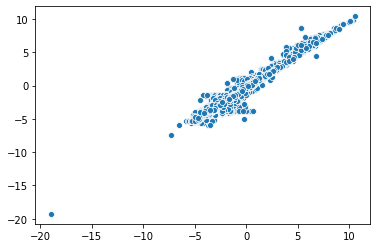

In [23]:
sb.scatterplot(np.log10(np.array(results_reference)), np.log10(np.array(results_2016)))

In [26]:
def masked_ratio(a, b):
    a, b = np.array(a), np.array(b)
    mask = (a != 0) * (b != 0)
    return a / b

/Users/cmutel/miniconda3/envs/bw2dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


OverflowError: cannot convert float infinity to integer

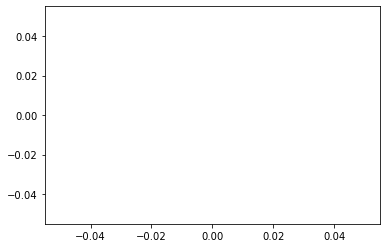

In [23]:
sb.distplot(masked_ratio(results_2016, results_reference))

In [24]:
def abnormal_ratio(a, b):
    if not a or not b:
        return
    ratio = abs(a / b)
    if 0.8 < ratio < 1.25:
        return
    return ratio

In [ ]:
exceptions = sorted([
    (abnormal_ratio(results_2016[i], results_reference[i]), bw2data.get_activity(key)) 
    for i, key in enumerate(keys) 
    if abnormal_ratio(results_2016[i], results_reference[i])
], reverse=True)

In [ ]:
len(exceptions)

In [ ]:
exceptions[:10]

In [ ]:
lca.redo_lci({exceptions[0][1]: 1})
lca.characterized_inventory = new_cm * lca.inventory